Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [7]:
import pandas as pd
import numpy as np
import time


start_time_pandas = time.time()
pandas_data = pd.DataFrame({'data': np.random.randint(1, 101, size=1000000)})
end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas


start_time_numpy = time.time()
numpy_data = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy


print(f"Pandas time: {pandas_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")


if pandas_time < numpy_time:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")




Pandas time: 0.009542 seconds
NumPy time: 0.006071 seconds
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [27]:
import pandas as pd
import numpy as np
import time

# Step 1: Load the dataset and calculate means with Pandas
start_time_pandas = time.time()
df = pd.read_csv('sleep_health.csv')

mean_values = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].mean()
print("Pandas Mean Values:\n", mean_values)

# Step 3: Calculate correlation with Pandas
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
corr_sleep_age = correlation_matrix.loc['Sleep Duration', 'Age']
corr_sleep_heart_rate = correlation_matrix.loc['Sleep Duration', 'Heart Rate']
corr_sleep_daily_steps = correlation_matrix.loc['Sleep Duration', 'Daily Steps']

print("Pandas Correlations:")
print("Sleep Duration and Age:", corr_sleep_age)
print("Sleep Duration and Heart Rate:", corr_sleep_heart_rate)
print("Sleep Duration and Daily Steps:", corr_sleep_daily_steps)

# Step 5: Calculate standard deviation for 'Sleep Duration' with Pandas
std_sleep_duration = df['Sleep Duration'].std()
print("Pandas Standard Deviation of Sleep Duration:", std_sleep_duration)

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

# Step 2: Calculate means with NumPy
start_time_numpy = time.time()
data = df[['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 'Heart Rate', 'Daily Steps']].to_numpy()

mean_values_numpy = np.mean(data, axis=0)
print("NumPy Mean Values:\n", mean_values_numpy)

# Step 4: Calculate correlation with NumPy
numerical_data = df.select_dtypes(include=[np.number]).to_numpy()
correlation_matrix_numpy = np.corrcoef(numerical_data, rowvar=False)

# Find the correct indices for Sleep Duration, Age, Heart Rate, and Daily Steps
sleep_index = 0  # Sleep Duration is the first column in numerical_data
age_index = 1     # Adjust this if Age is not the second column
heart_rate_index = 3  # Adjust this if Heart Rate is not the fourth column
daily_steps_index = 4  # Adjust this if Daily Steps is not the fifth column

corr_sleep_age_numpy = correlation_matrix_numpy[sleep_index, age_index]
corr_sleep_heart_rate_numpy = correlation_matrix_numpy[sleep_index, heart_rate_index]
corr_sleep_daily_steps_numpy = correlation_matrix_numpy[sleep_index, daily_steps_index]

print("NumPy Correlations:")
print("Sleep Duration and Age:", corr_sleep_age_numpy)
print("Sleep Duration and Heart Rate:", corr_sleep_heart_rate_numpy)
print("Sleep Duration and Daily Steps:", corr_sleep_daily_steps_numpy)

# Step 6: Standard Deviation for 'Sleep Duration' with NumPy
std_sleep_duration_numpy = np.std(data[:, 0], ddof=1)  # ddof=1 for sample std deviation
print("NumPy Standard Deviation of Sleep Duration:", std_sleep_duration_numpy)

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

# Timing results
print(f"Pandas Time: {pandas_time:.6f} seconds")
print(f"NumPy Time: {numpy_time:.6f} seconds")




Pandas Mean Values:
 Sleep Duration                 7.132086
Systolic blood pressure      128.553476
Diastolic blood pressure      84.649733
Heart Rate                    70.165775
Daily Steps                 6816.844920
dtype: float64
Pandas Correlations:
Sleep Duration and Age: 0.3447093581647443
Sleep Duration and Heart Rate: -0.516454888517144
Sleep Duration and Daily Steps: -0.039532537675731685
Pandas Standard Deviation of Sleep Duration: 0.7956567308898188
NumPy Mean Values:
 [   7.13208556  128.55347594   84.64973262   70.1657754  6816.84491979]
NumPy Correlations:
Sleep Duration and Age: 0.9905164030218654
Sleep Duration and Heart Rate: 0.4316120785527808
Sleep Duration and Daily Steps: 0.14988220060792076
NumPy Standard Deviation of Sleep Duration: 0.7956567308898189
Pandas Time: 0.005000 seconds
NumPy Time: 0.002000 seconds


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

d:\Programming_Software\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


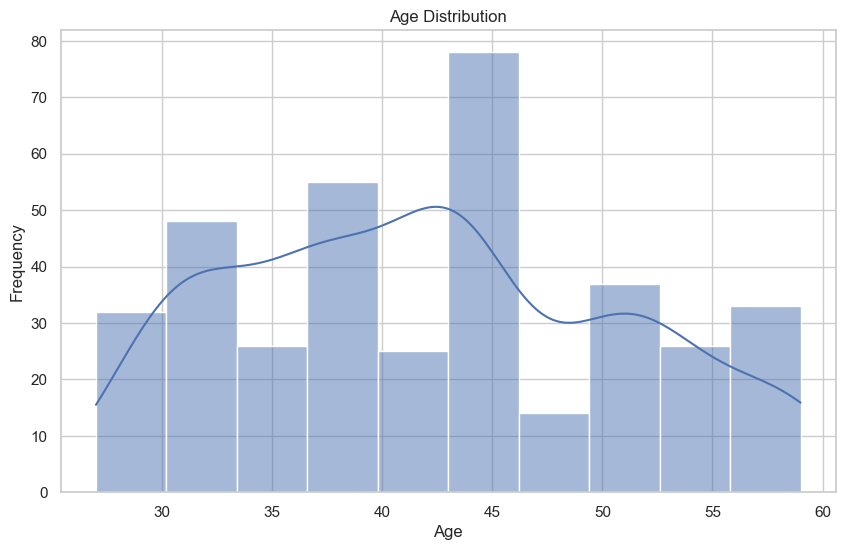

d:\Programming_Software\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


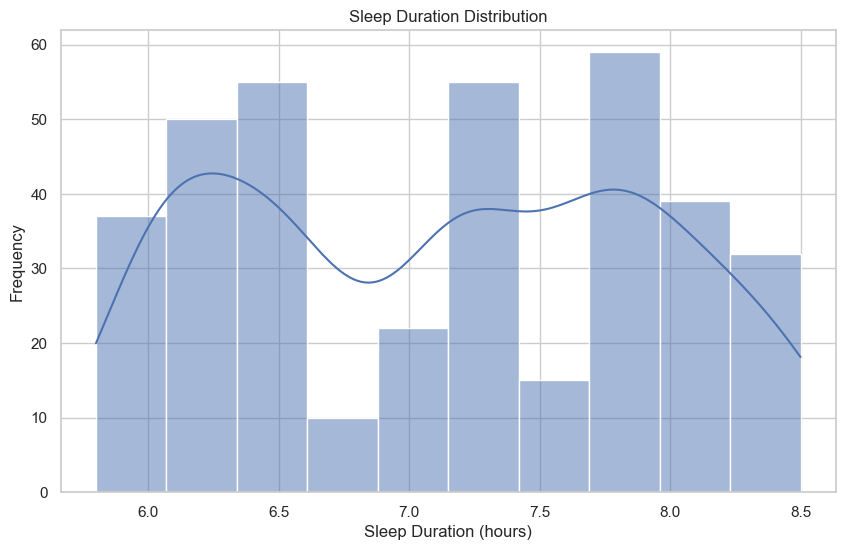

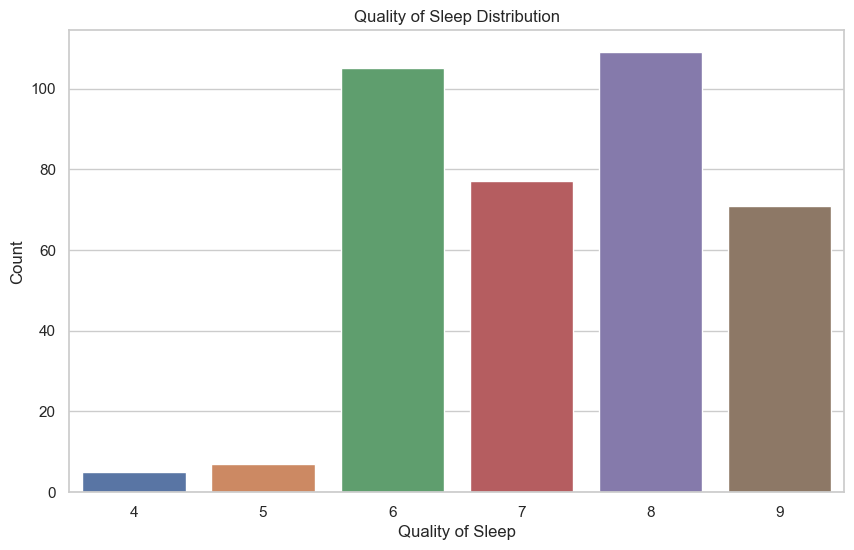

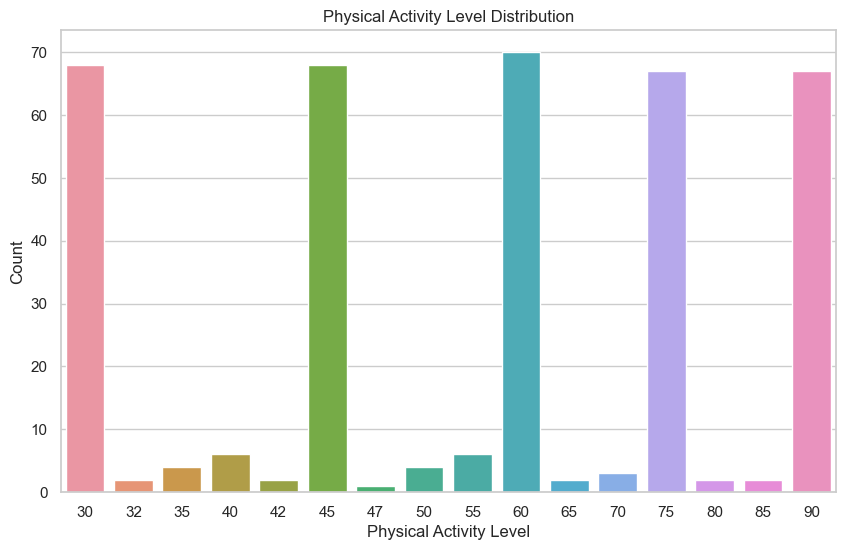

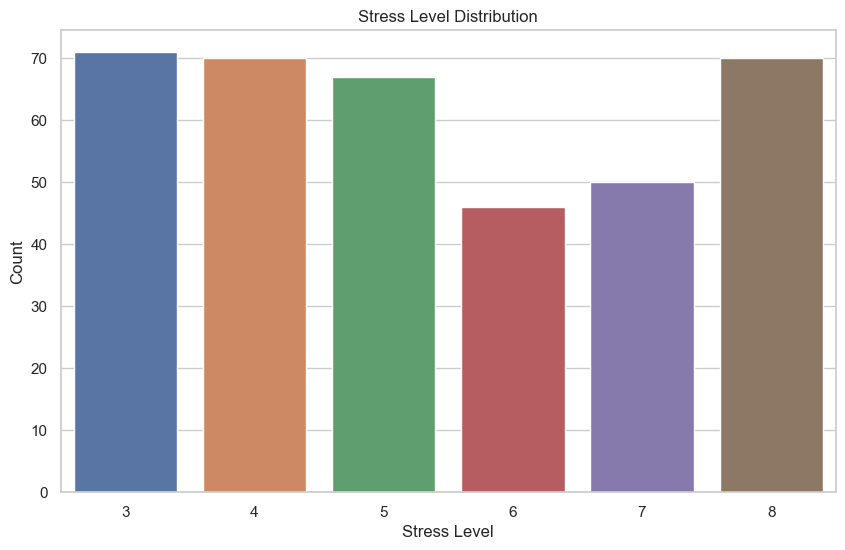

d:\Programming_Software\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


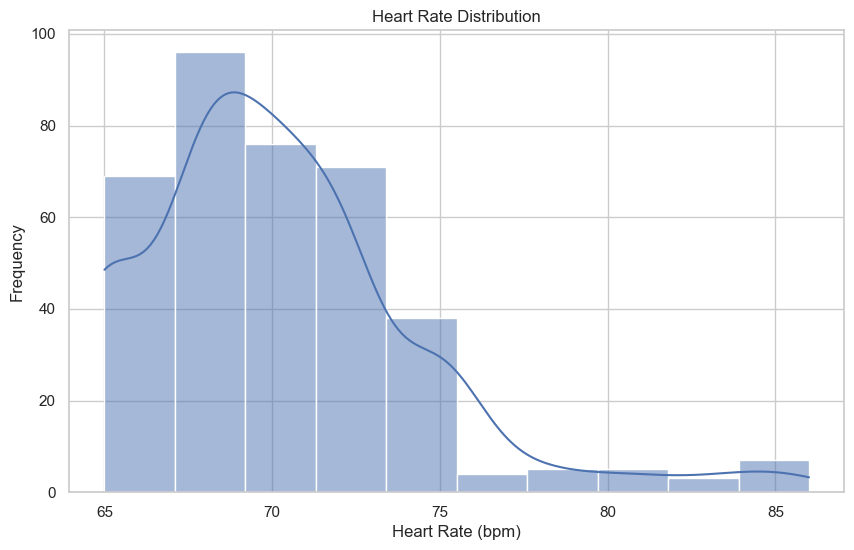

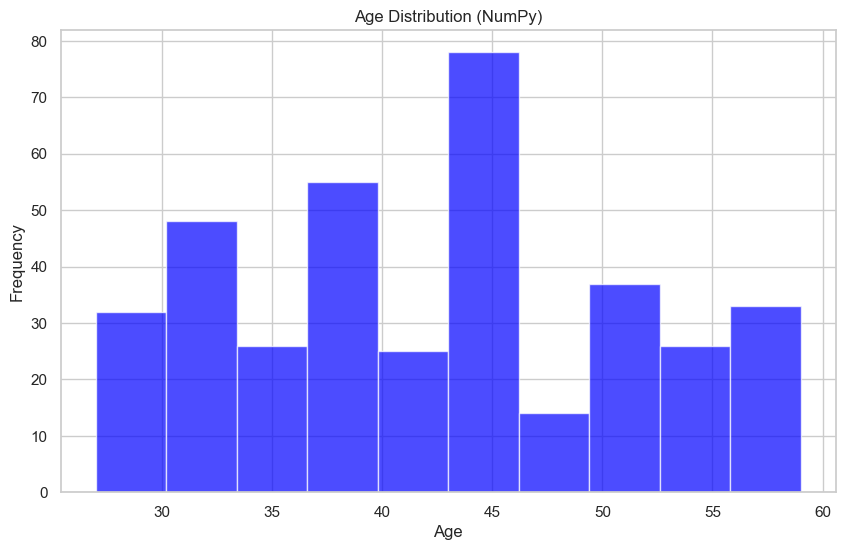

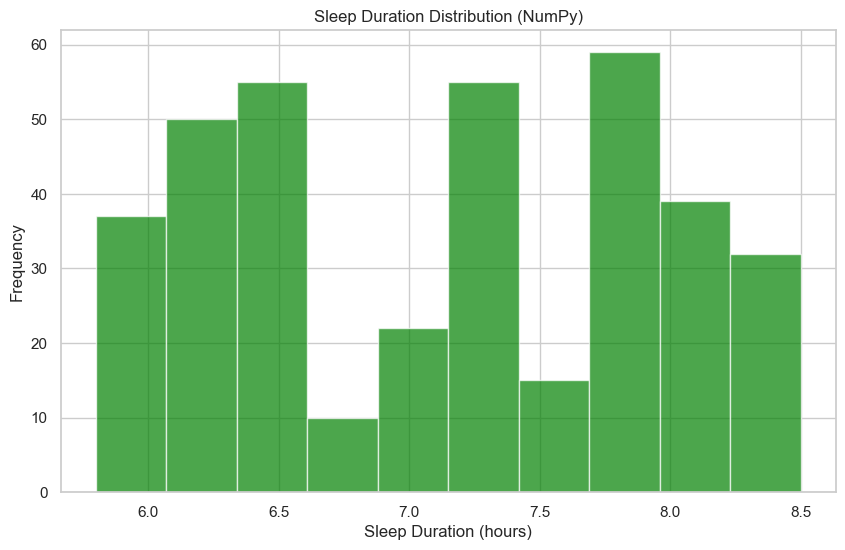

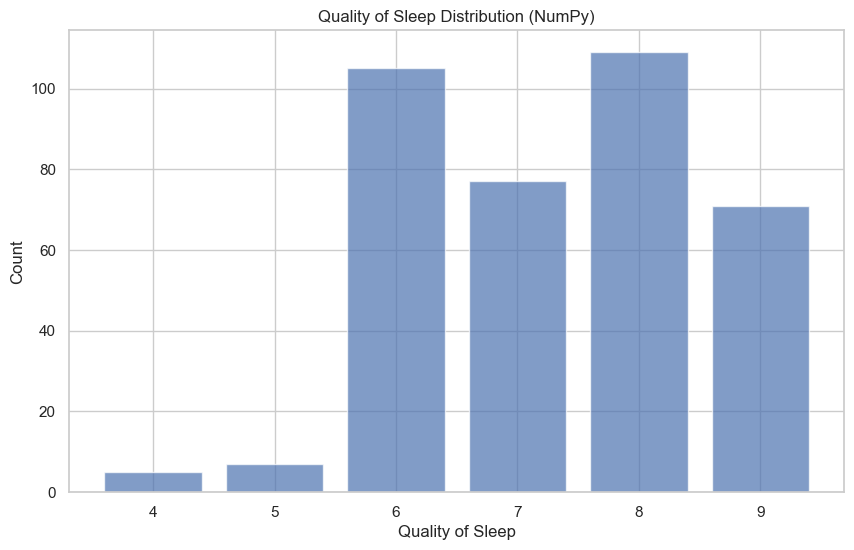

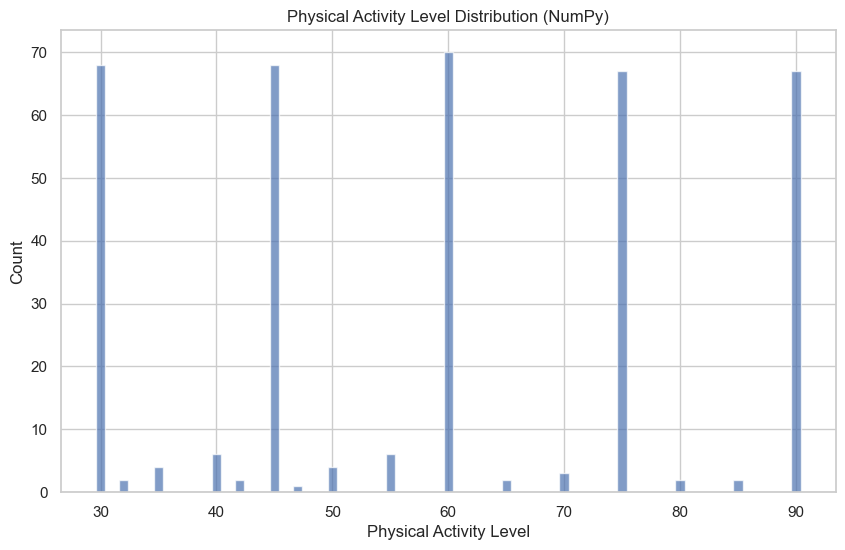

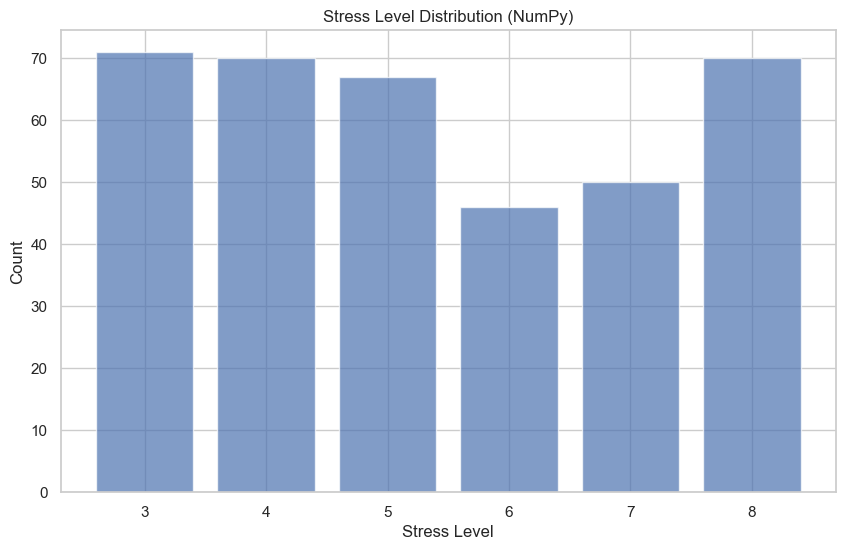

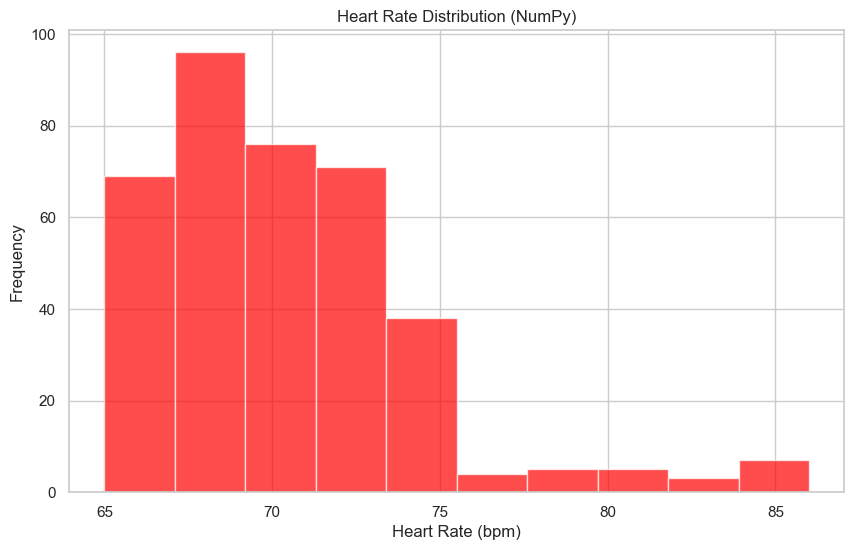

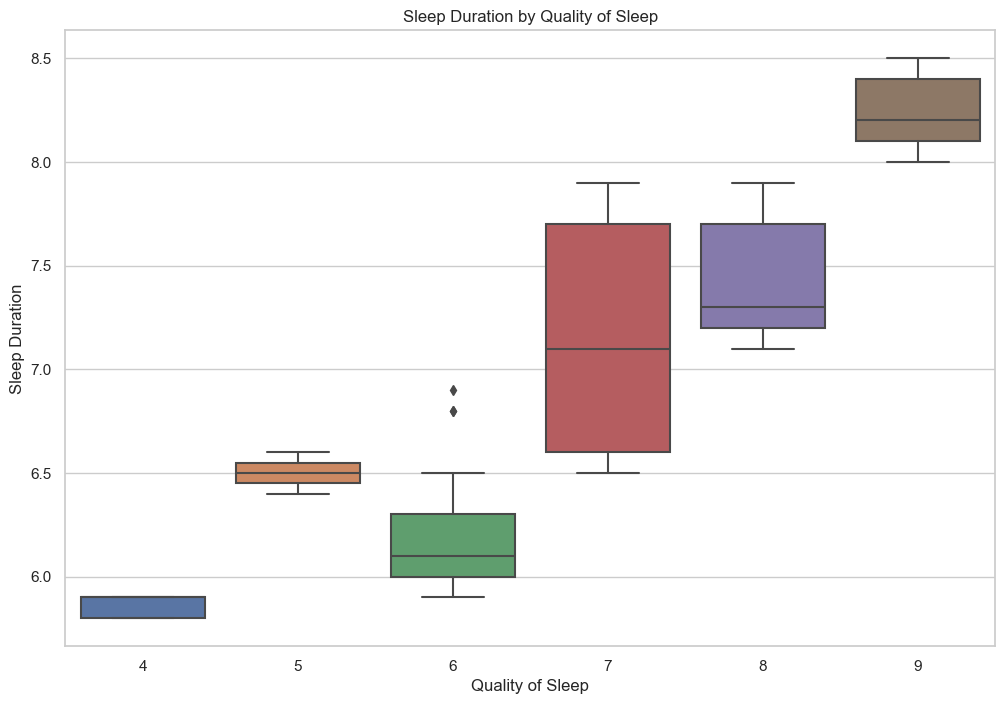

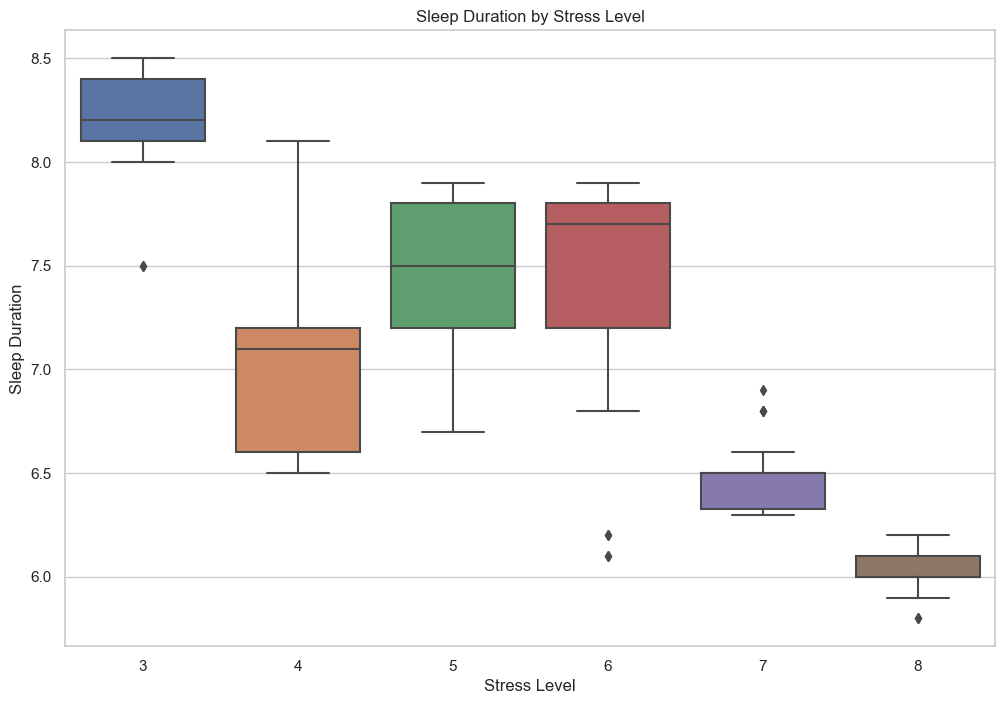

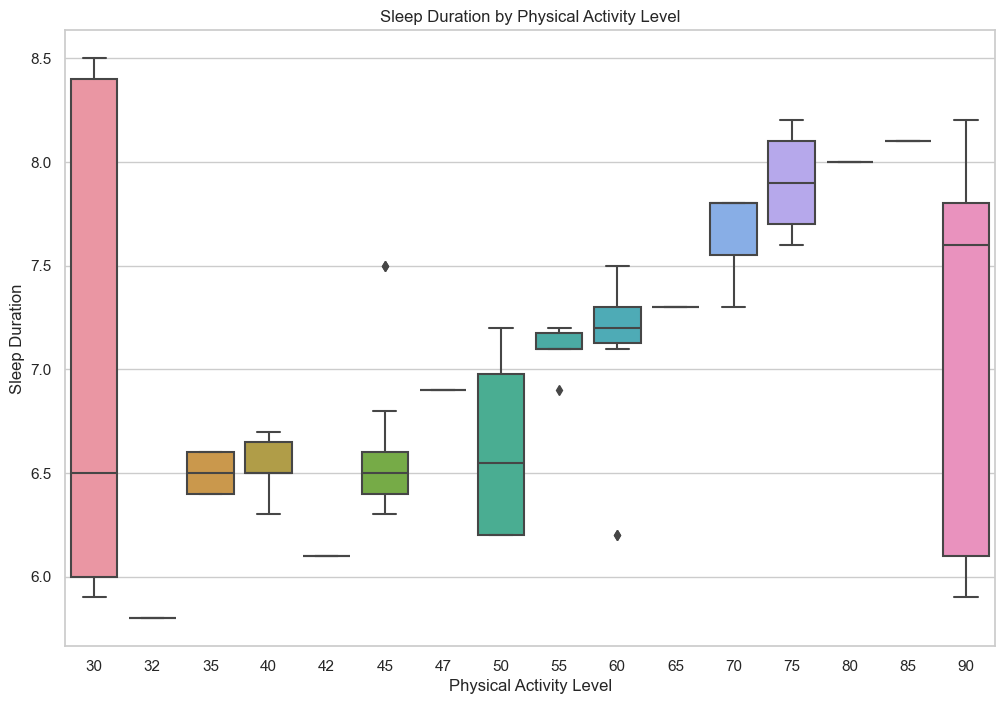

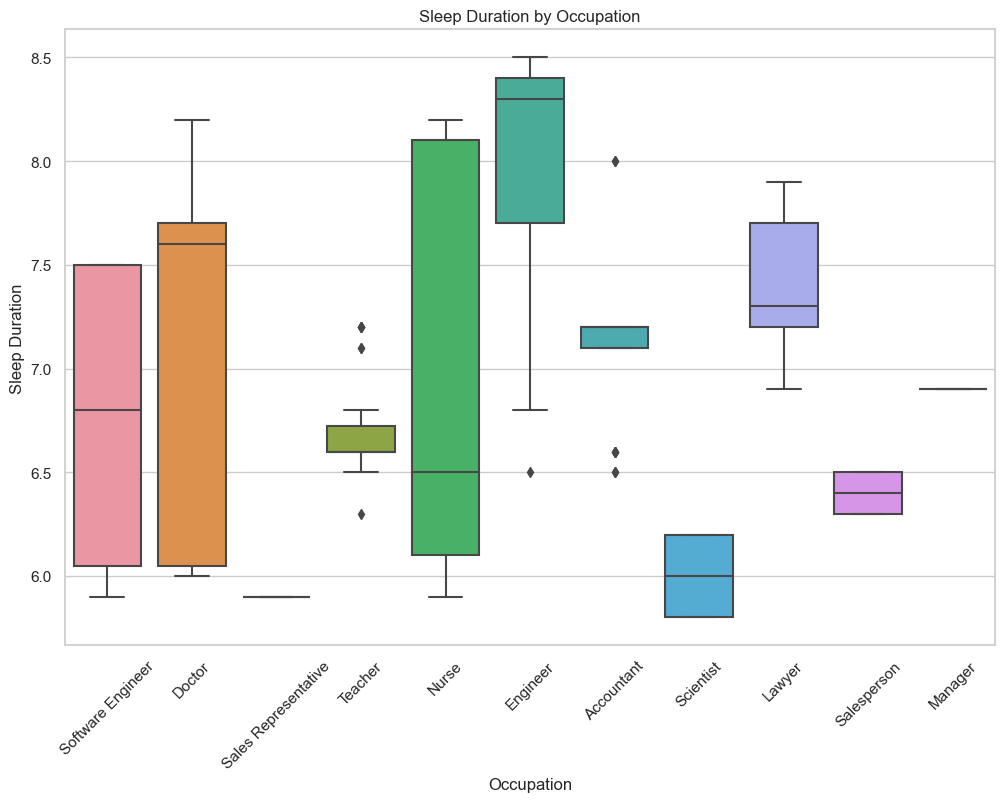

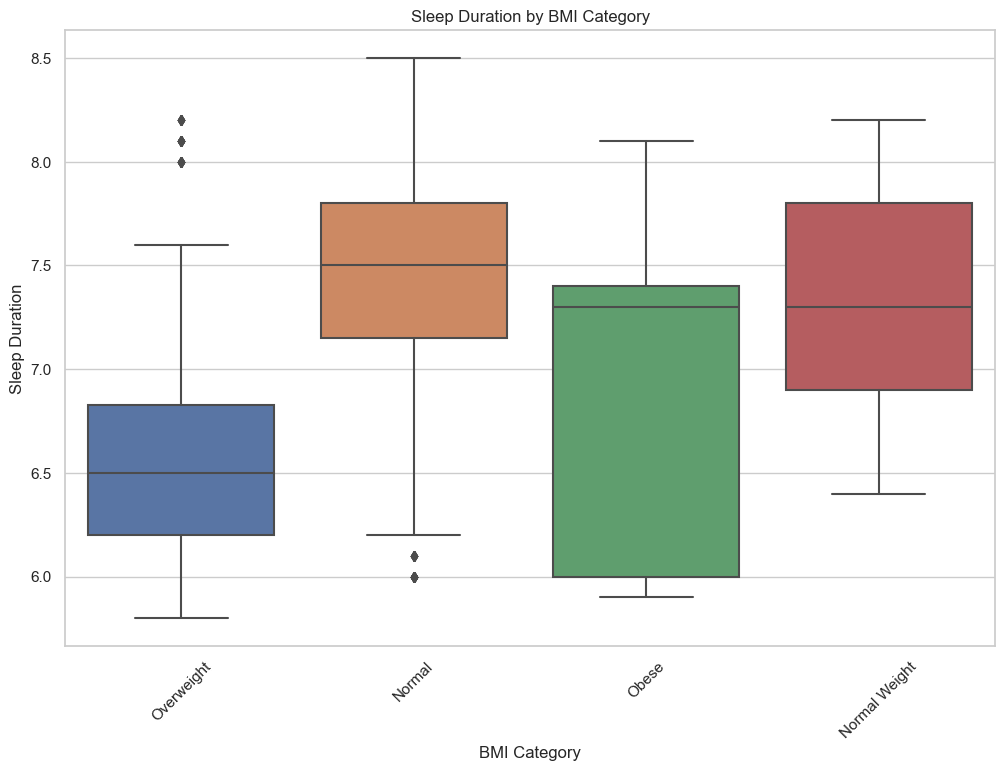

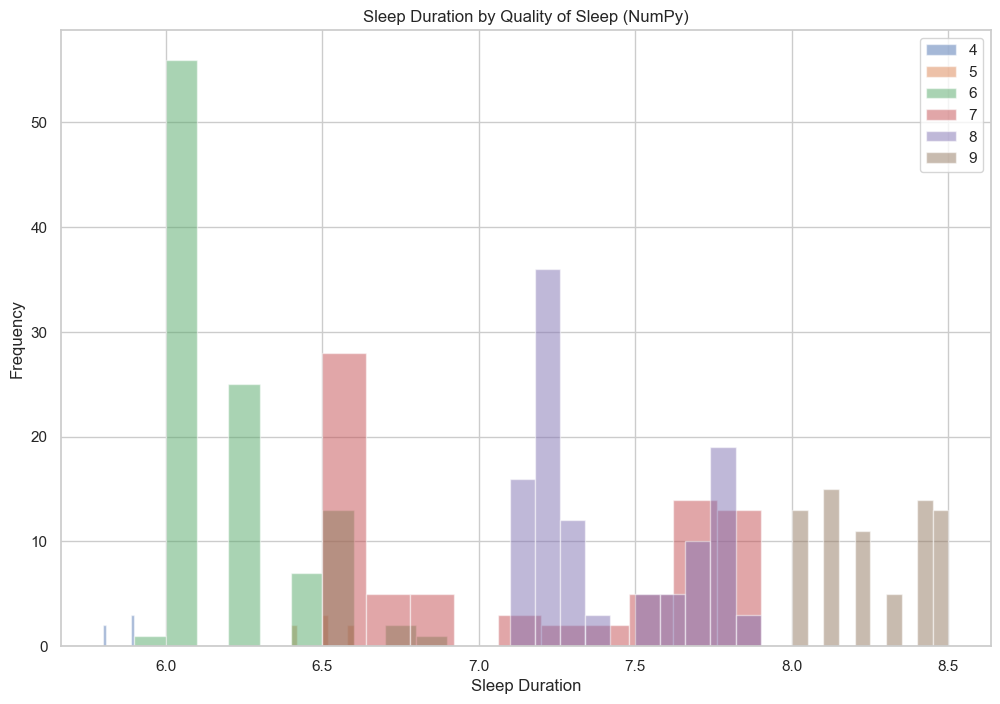

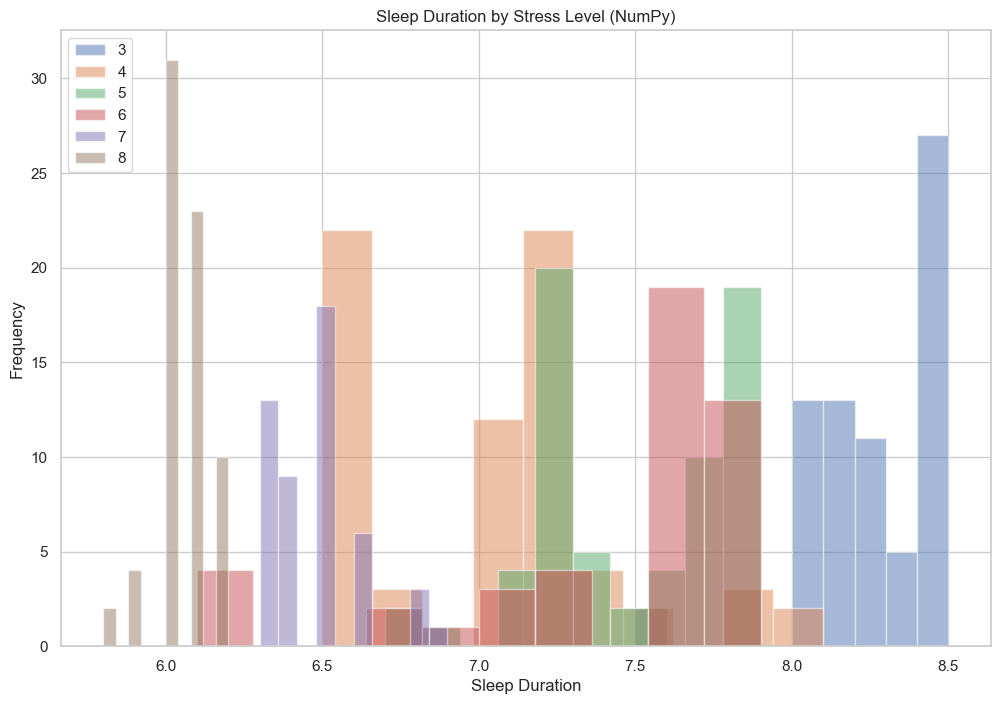

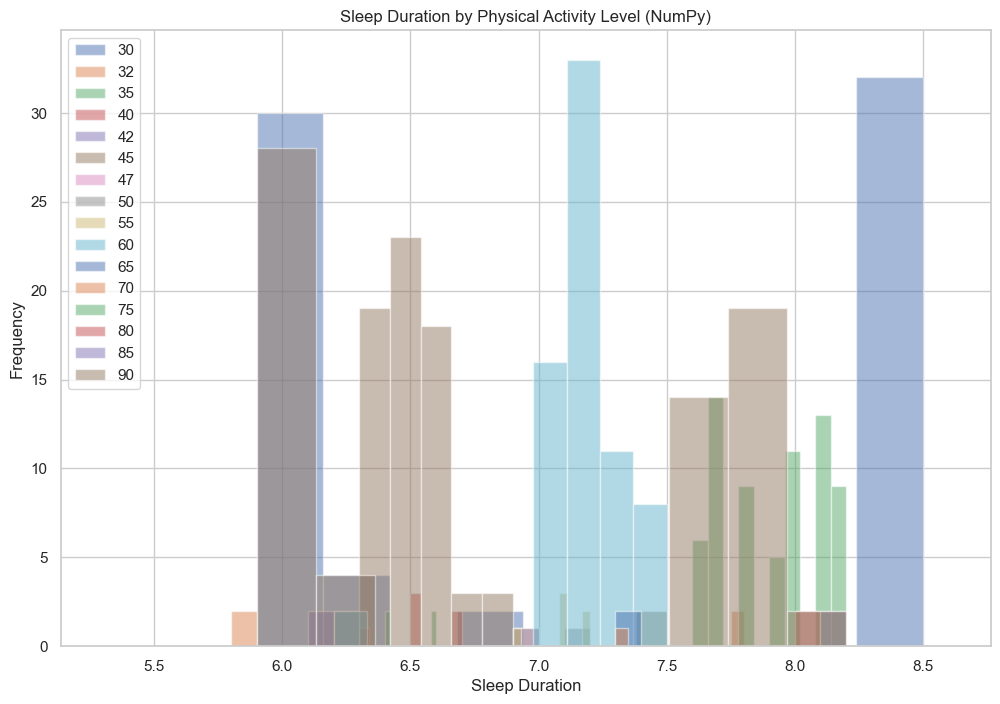

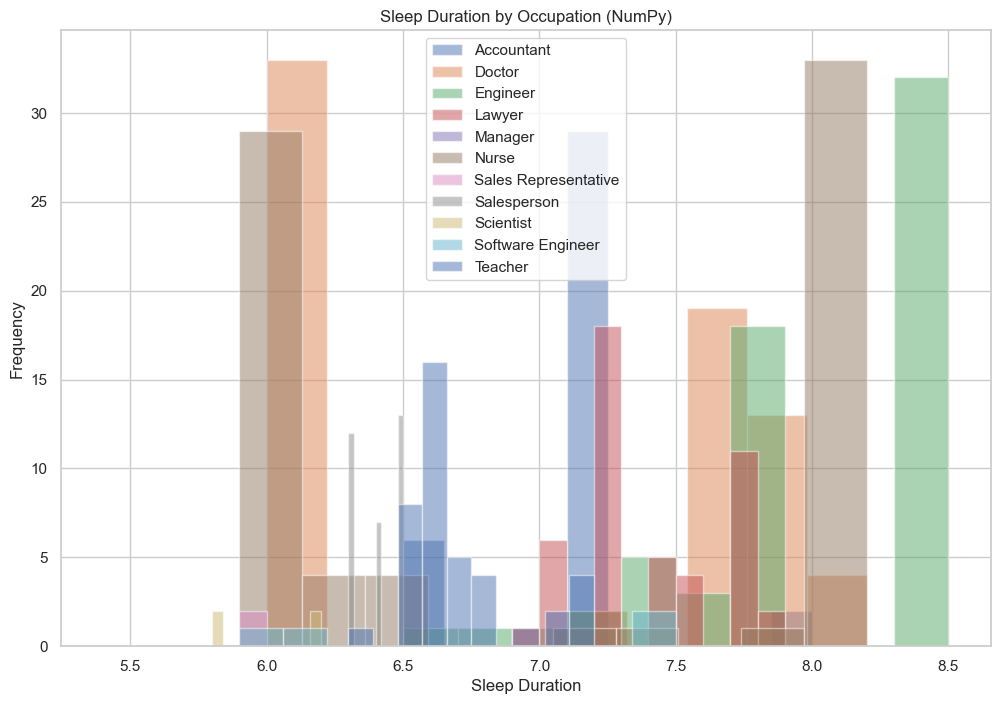

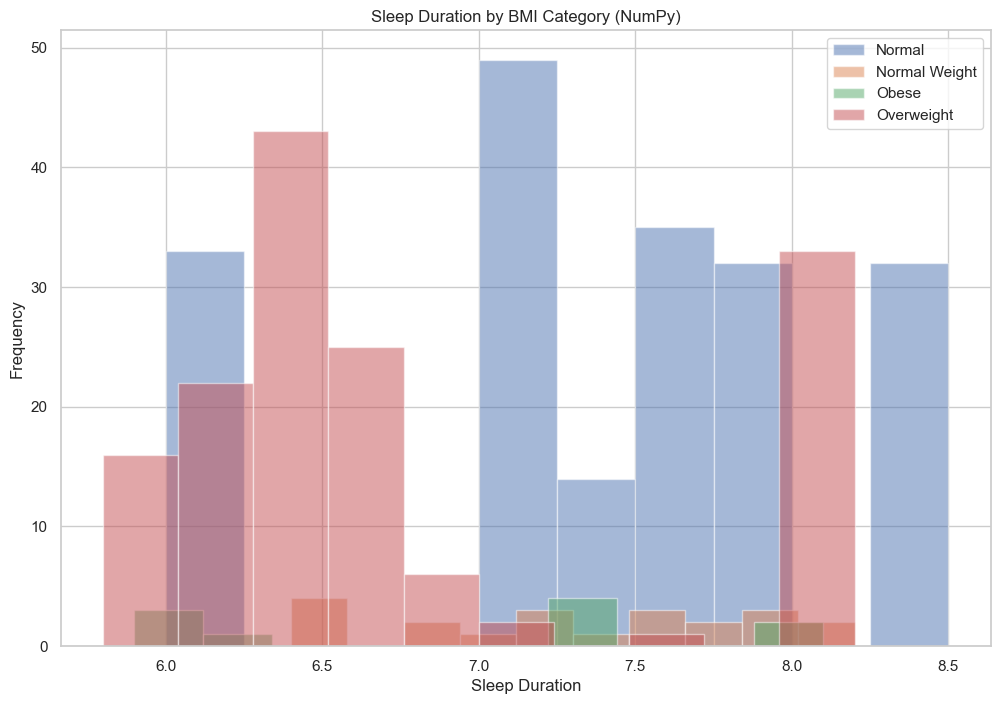

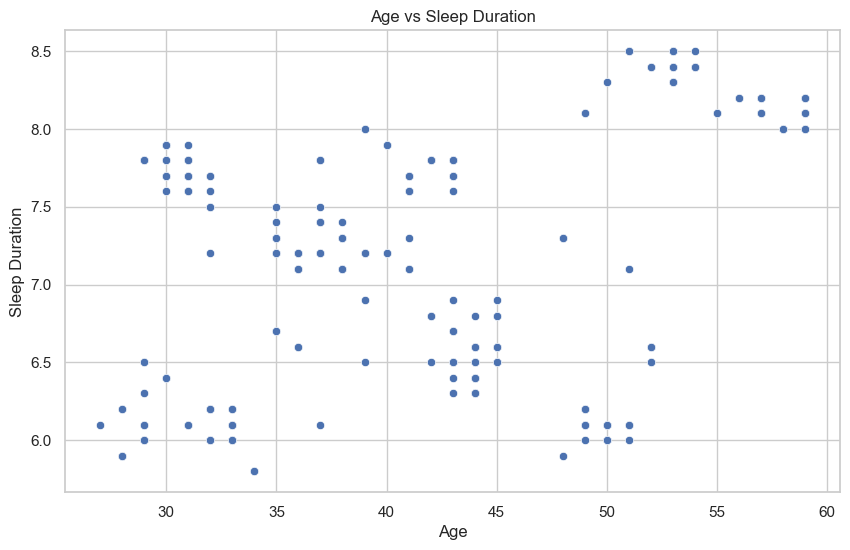

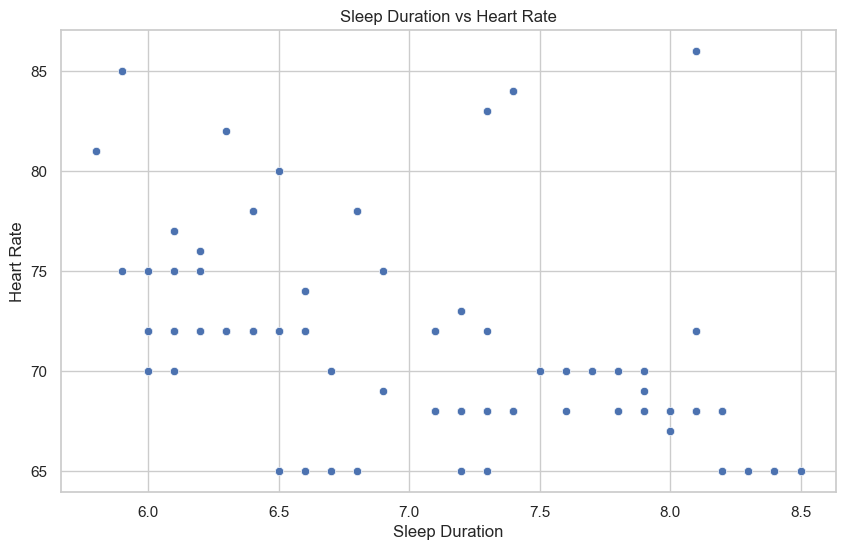

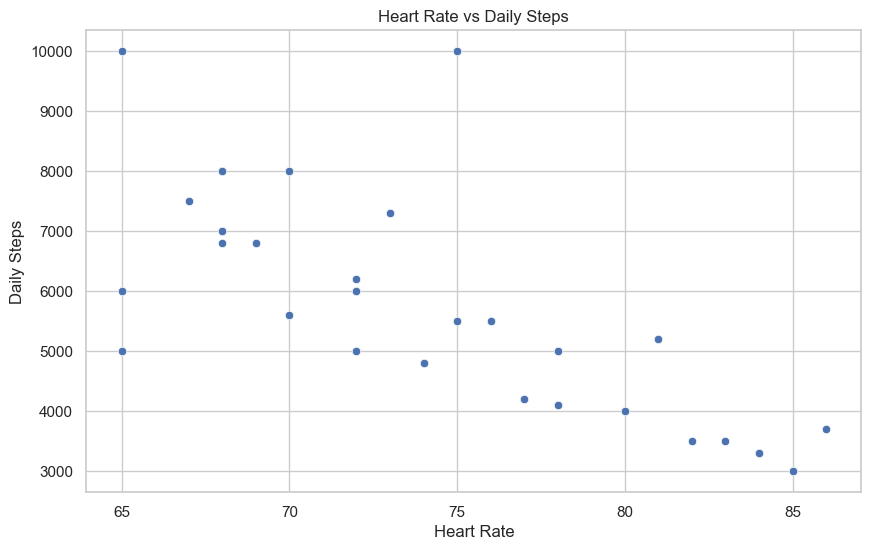

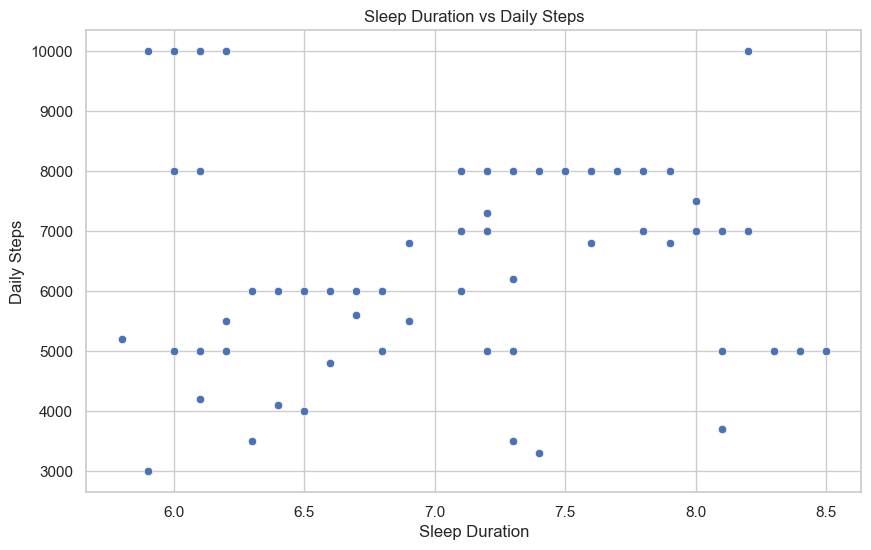

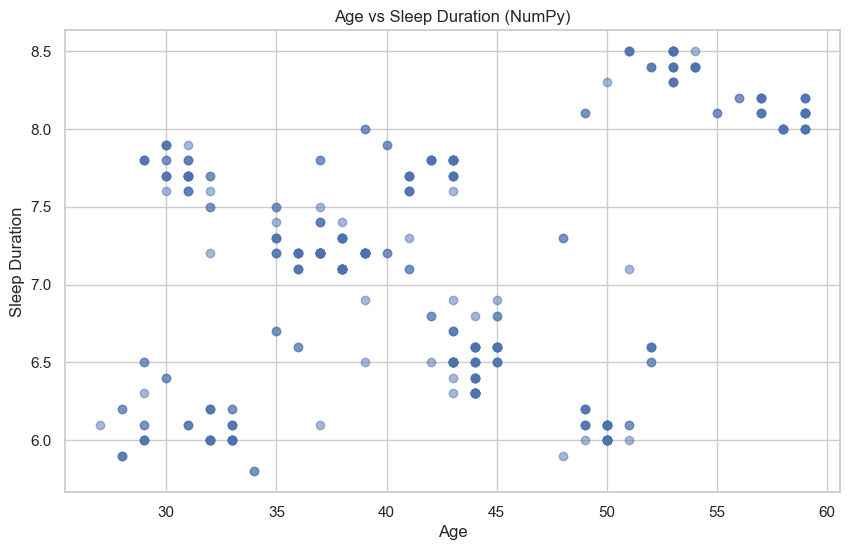

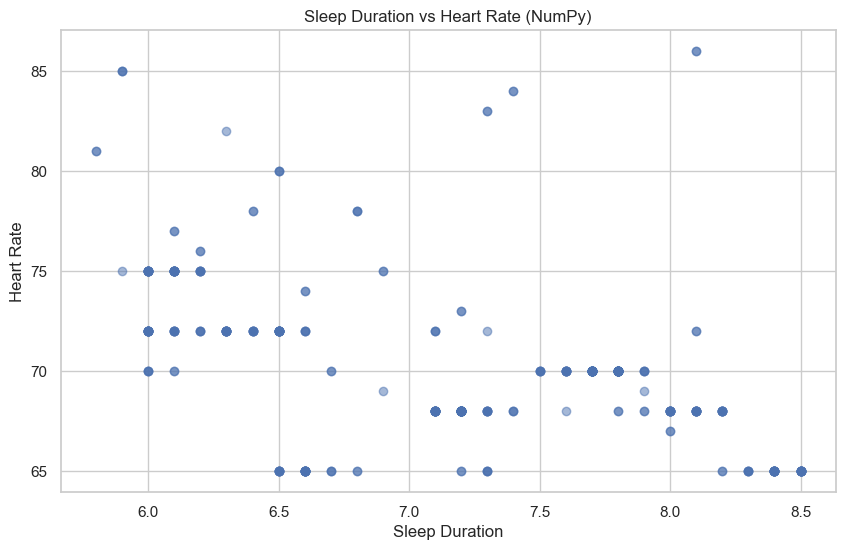

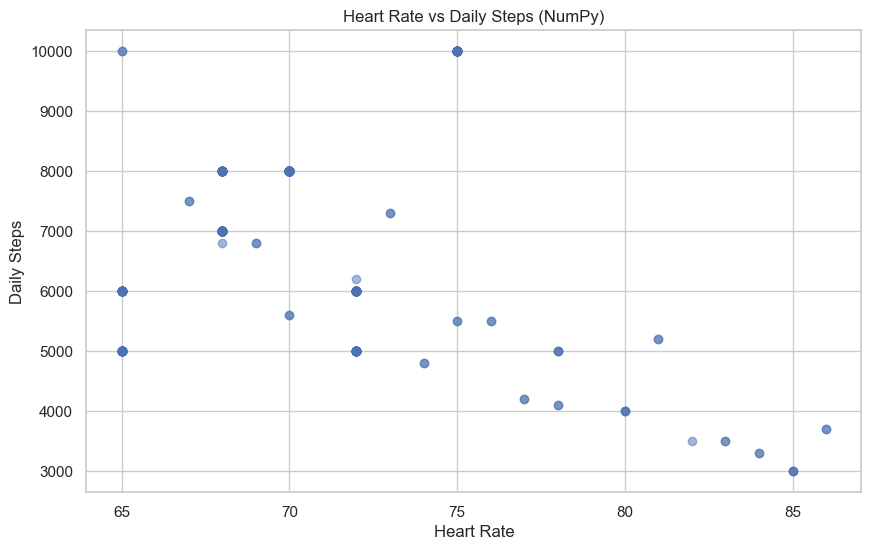

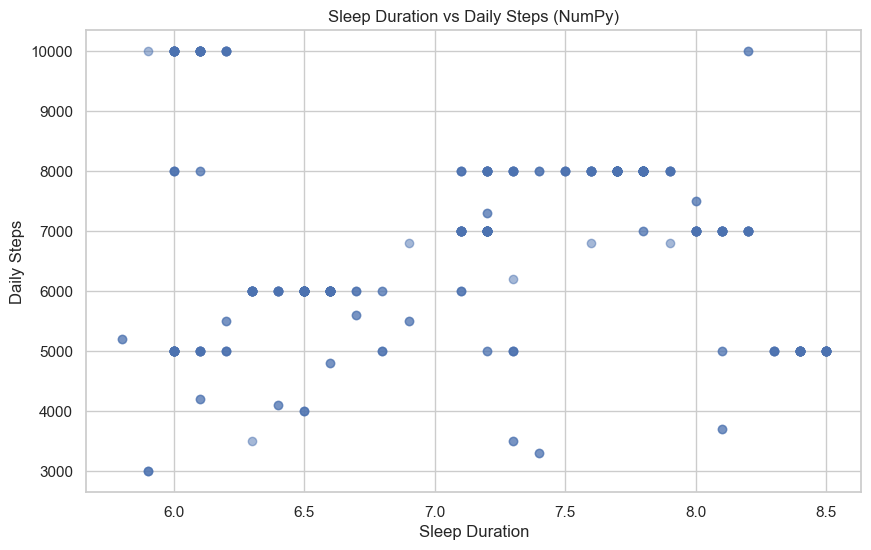

Pandas Plotting Time: 1.078833 seconds
NumPy Plotting Time: 0.788274 seconds


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load the dataset
df = pd.read_csv('sleep_health.csv')

# Set seaborn style
sns.set(style='whitegrid')

# Step 1: Plot distributions using Pandas
start_time_pandas = time.time()

# 1.1 Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 1.2 Sleep Duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], bins=10, kde=True)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# 1.3 Quality of Sleep distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Quality of Sleep', data=df)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.show()

# 1.4 Physical Activity Level distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Physical Activity Level', data=df)
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.show()

# 1.5 Stress Level distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress Level', data=df)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

# 1.6 Heart Rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Heart Rate'], bins=10, kde=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

# Step 2: Plot distributions using NumPy
start_time_numpy = time.time()

# 2.1 Age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, alpha=0.7, color='blue')
plt.title('Age Distribution (NumPy)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2.2 Sleep Duration distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Sleep Duration'], bins=10, alpha=0.7, color='green')
plt.title('Sleep Duration Distribution (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# 2.3 Quality of Sleep distribution
quality_counts = np.unique(df['Quality of Sleep'], return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(quality_counts[0], quality_counts[1], alpha=0.7)
plt.title('Quality of Sleep Distribution (NumPy)')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.show()

# 2.4 Physical Activity Level distribution
activity_counts = np.unique(df['Physical Activity Level'], return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(activity_counts[0], activity_counts[1], alpha=0.7)
plt.title('Physical Activity Level Distribution (NumPy)')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.show()

# 2.5 Stress Level distribution
stress_counts = np.unique(df['Stress Level'], return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(stress_counts[0], stress_counts[1], alpha=0.7)
plt.title('Stress Level Distribution (NumPy)')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

# 2.6 Heart Rate distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Heart Rate'], bins=10, alpha=0.7, color='red')
plt.title('Heart Rate Distribution (NumPy)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

# Step 3: Distribution of Sleep Duration based on categories using Pandas
plt.figure(figsize=(12, 8))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Quality of Sleep')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Stress Level')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Physical Activity Level')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Occupation')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('Sleep Duration by BMI Category')
plt.xticks(rotation=45)
plt.show()

# Step 4: Distribution of Sleep Duration based on categories using NumPy
# Note: For NumPy, we will use histograms or box plots with categorical data processing.
for category in ['Quality of Sleep', 'Stress Level', 'Physical Activity Level', 'Occupation', 'BMI Category']:
    plt.figure(figsize=(12, 8))
    unique_categories = np.unique(df[category])
    for cat in unique_categories:
        plt.hist(df[df[category] == cat]['Sleep Duration'], alpha=0.5, label=str(cat), bins=10)
    plt.title(f'Sleep Duration by {category} (NumPy)')
    plt.xlabel('Sleep Duration')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Step 5: Relationships using Pandas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=df)
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration')
plt.ylabel('Heart Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=df)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate')
plt.ylabel('Daily Steps')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Daily Steps', data=df)
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration')
plt.ylabel('Daily Steps')
plt.show()

# Step 6: Relationships using NumPy
# Note: We will create scatter plots for relationships
for x, y in [('Age', 'Sleep Duration'), ('Sleep Duration', 'Heart Rate'), ('Heart Rate', 'Daily Steps'), ('Sleep Duration', 'Daily Steps')]:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.title(f'{x} vs {y} (NumPy)')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Timing results
print(f"Pandas Plotting Time: {pandas_time:.6f} seconds")
print(f"NumPy Plotting Time: {numpy_time:.6f} seconds")



AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

